<a href="https://colab.research.google.com/github/EssenceBL/MakingFriends/blob/main/From_Spirographs_to_a_Programmable_Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preface

As is well-known, computers have greatly advanced the field of education and teaching methodologies; and there are various level of sophistication in its usage. Firstly, high-quality typesetting documents with TeX and LaTeX have enabled an elegant display of mathematical equations. Secondly, computer graphics have provided static images to support learning. Thirdly, animations and videos, such as those found on the YouTube channel 3blue1brown, have been used to enhance the learning experience. Next, interactive software like GeoGebra and JSXGraph have enabled users to simulate various phenomena. Finally, as we grow in our maturity, we could use programmable environments to take greater control and make a fuller use of the computer. To begin with, let's play with Google Colab!

-- YK Tai co-writing with Sage in 2023

Like other programmable environment, let's begin with the very first line of printing "Hello World!" to get a sense of it. You may do so by going to the cell code and click the run button, or use keyboard to type Shift+Enter:


In [1]:
print("Hello World!")

Hello World!



Recall from somewhere else, such as in geogebra, you might have learnt how to interpret a [spirograph](https://en.wikipedia.org/wiki/Spirograph) as a parametric curve that describe the trajectory of a given point with distance $a$ from the center of a circle of radius $r$, that rolls along with another circle of radius $R$. Indeed, there are various natural ways of parametrization. Here we recall two:
One is to parametrize with reference to the rolling angle of the line connecting the centers of the two circles with as $\theta$;
\begin{align}
x_\theta &= (R-r)\cos \theta+a\cos (\frac{R-r}{r}\theta) \\
y_\theta &= (R-r)\sin \theta-a\sin(\frac{R-r}{r}\theta)
\end{align}
An obvious alternative is to parametrize with reference to the rolling angle of the line connecting the center of the rolling circle and the point of trajectory as $\theta' = \frac{R-r}{r}\theta$.

A more concise parametrization can be obtained by substitutions $k = R-r$, $N = \frac{R-r}{r}$. In such a way, it would be convenient to represent the trajectory with complex numbers $x_\theta+iy_\theta = k e^{i \theta} + a e^{- i N \theta}$.

In default settings, we should be using the first parametrization and some common packages to compute and plot some spirographs. Audiences may attempt to amend to other parametrization if they feel efficacious to do so.

Please make sure the following packages is imported for the rest of this notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now, please run the following code cell to define spirograph.

In [3]:
#find the gcd of two given integers
def gcdEuclid(a, b):
  if a == 0:
    return b
  return gcdEuclid(b % a, a)

#define the spirograph
def spirograph(R, r, a, boundary, step=360):
  R = int(R)
  r = int(r)
  #compute number of cycles to complete the spirograph
  n = abs(int(r/gcdEuclid(R,r)))
  s = np.array(range(n*step+1))
  plt.rcParams["figure.figsize"] = (8,8)
  plt.xlim(-boundary,boundary)
  plt.ylim(-boundary,boundary)
  thetas = 2*np.pi*s/step
  xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)
  ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
  plt.plot(xs, ys)


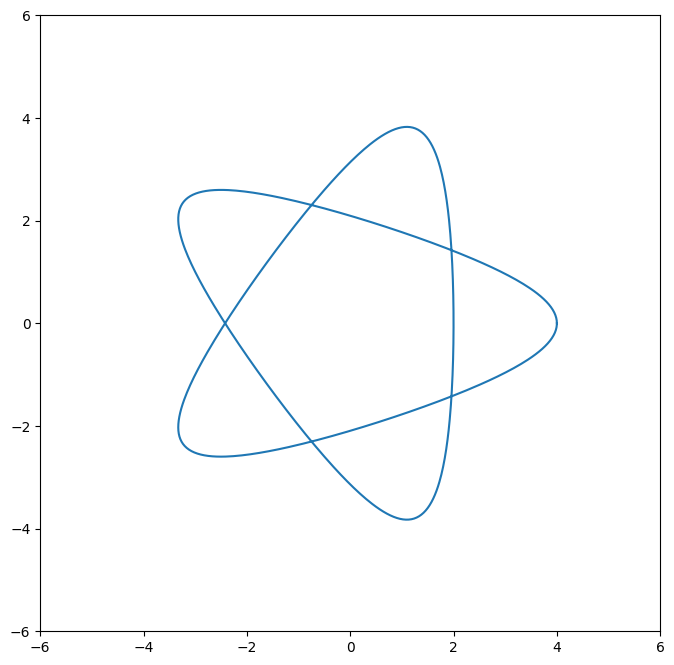

In [4]:
spirograph(R=5, r=2, a=1, boundary=6, step=360)
#uncomment the next line to play with an alternative
#spirograph(R=53, r=51, a=5, boundary=10, step=360)

When $r=a$, we have the special case of a [hypocycloid](https://en.wikipedia.org/wiki/Hypocycloid):

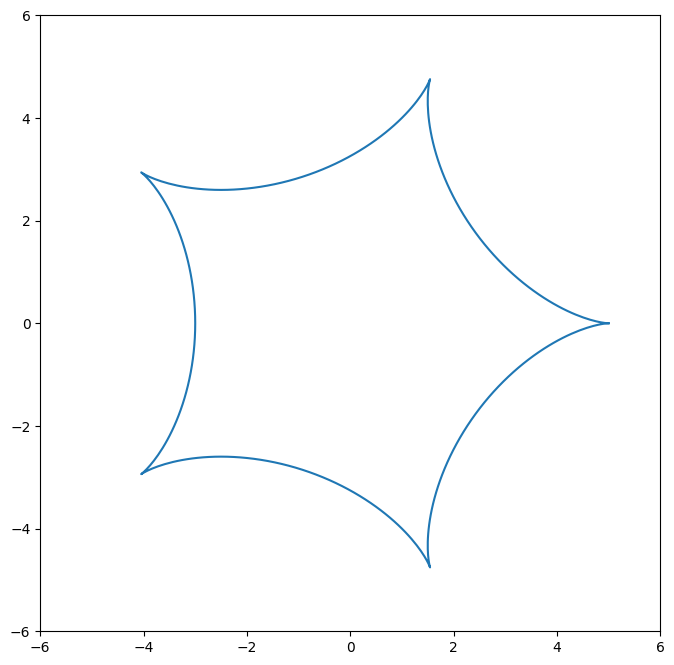

In [5]:
spirograph(R=5, r=1, a=1, boundary=6, step=360)
#uncomment the next line to play with an alternative
#spirograph(R=5, r=2, a=2, boundary=6, step=360)

When the sign of $r$ is taken oppositely, we would have an [epitrochoid](https://en.wikipedia.org/wiki/Epitrochoid):

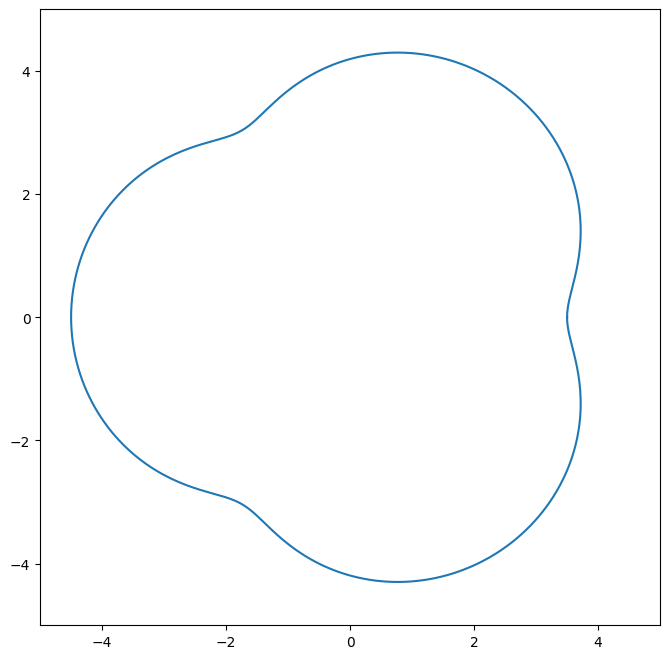

In [6]:
spirograph(R=3, r=-1, a=-1/2, boundary=5, step=360)
#uncomment the next line for an alternative to play with
#spirograph(R=37, r=-8, a=5, boundary=60, step=360)

In such a way, the [cardioid](https://en.wikipedia.org/wiki/Cardioid) is also in this family of curves:

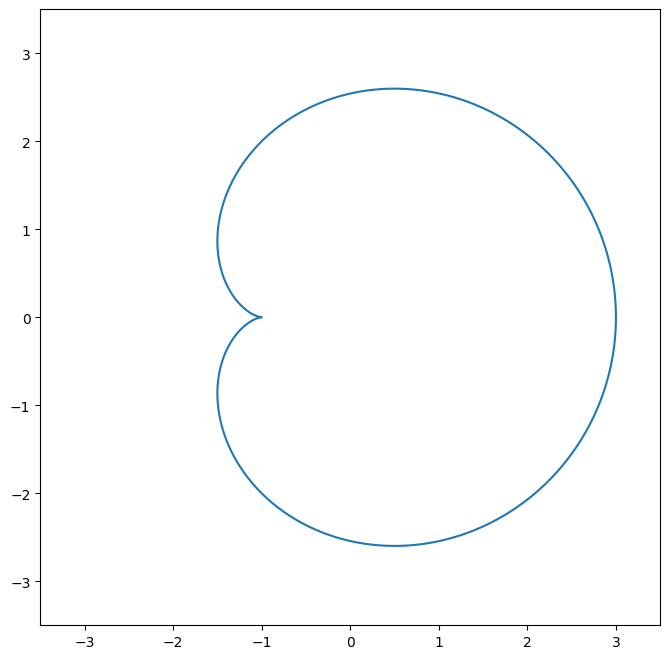

In [7]:
spirograph(R=1, r=-1,a=1, boundary=3.5, step=360)

In a programmable environment, it would be easy to create loops:

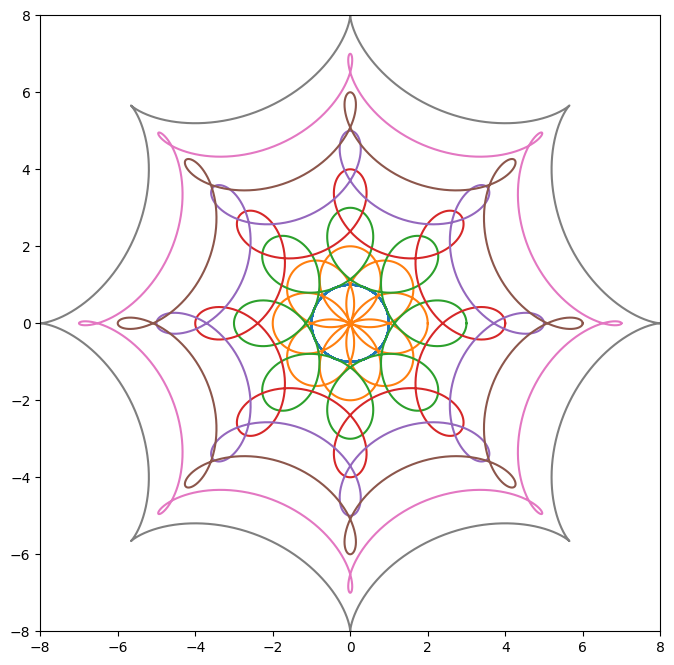

In [8]:
#loop over a for given R and r
def aRanging(R, r, boundary, step=360):
  R = int(R)
  r = int(r)
  for a in range(0,r+1):
    #compute number of cycles to complete the spirograph
    n = abs(int(r/gcdEuclid(R,r)))
    s = np.array(range(n*step+1))
    plt.rcParams["figure.figsize"] = (8,8)
    plt.xlim(-boundary,boundary)
    plt.ylim(-boundary,boundary)
    thetas = 2*np.pi*s/step
    xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)
    ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
    plt.plot(xs, ys)
  plt.show()
aRanging(8, 7, boundary=8, step=360)

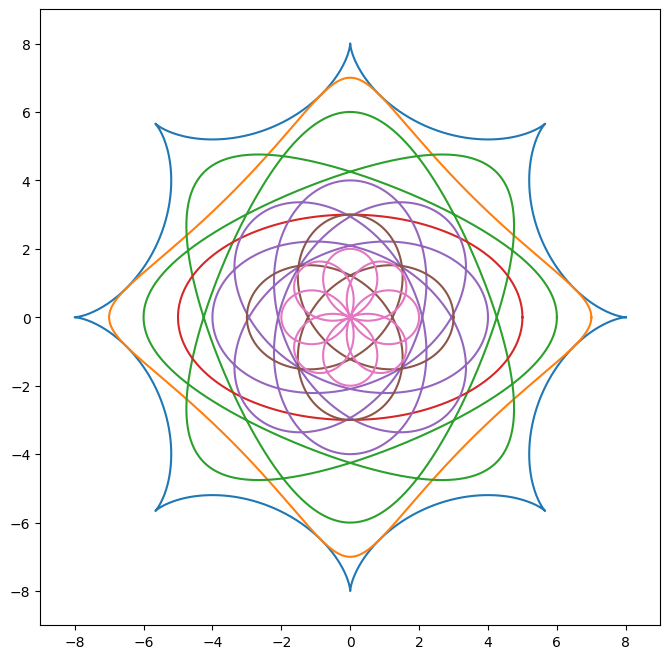

In [9]:
#loop over r for given R and a
def rRanging(R, a, boundary, step=360):
  R = int(R)
  for r in range(1,R):
    r = int(r)
    #compute number of cycles to complete the spirograph
    n = abs(int(r/gcdEuclid(R,r)))
    s = np.array(range(n*step+1))
    plt.rcParams["figure.figsize"] = (8,8)
    plt.xlim(-boundary,boundary)
    plt.ylim(-boundary,boundary)
    thetas = 2*np.pi*s/step
    xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)
    ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
    plt.plot(xs, ys)
  plt.show()

rRanging(8, 1, boundary=9, step=1000)

Loop over some hypocycloids, did you find anything special? Is it hard to explain your findings?


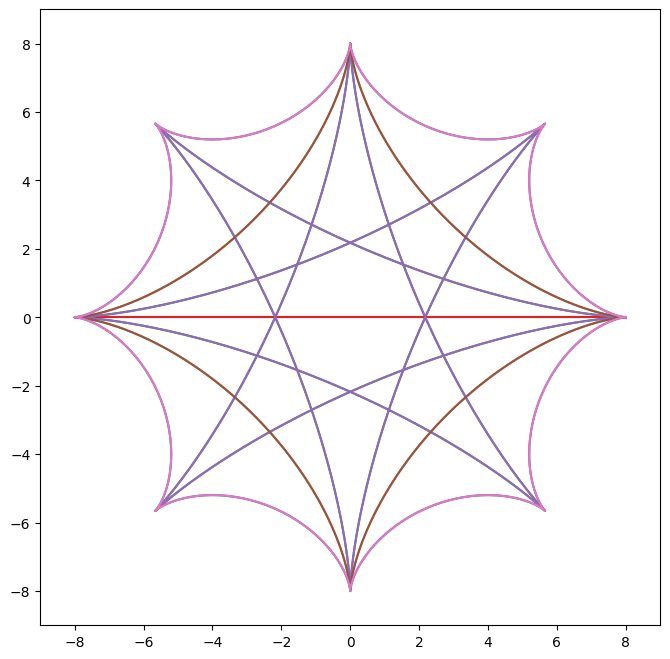

In [10]:
#let a and r loop at the same time
def loop1(R, step=360):
  R = int(R)
  boundary = R+1
  for r in range(1,R):
    a = r
    #compute number of cycles to complete the spirograph
    n = int(r/gcdEuclid(R,r))
    s = np.array(range(n*step+1))
    plt.rcParams["figure.figsize"] = (8,8)
    plt.xlim(-boundary,boundary)
    plt.ylim(-boundary,boundary)
    thetas = 2*np.pi*s/step
    xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)
    ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
    plt.plot(xs, ys)
  plt.show()
loop1(R=8, step=360)

How about this loop? Would some phenomena have a deep meaning behind them, to make such a coincidence?

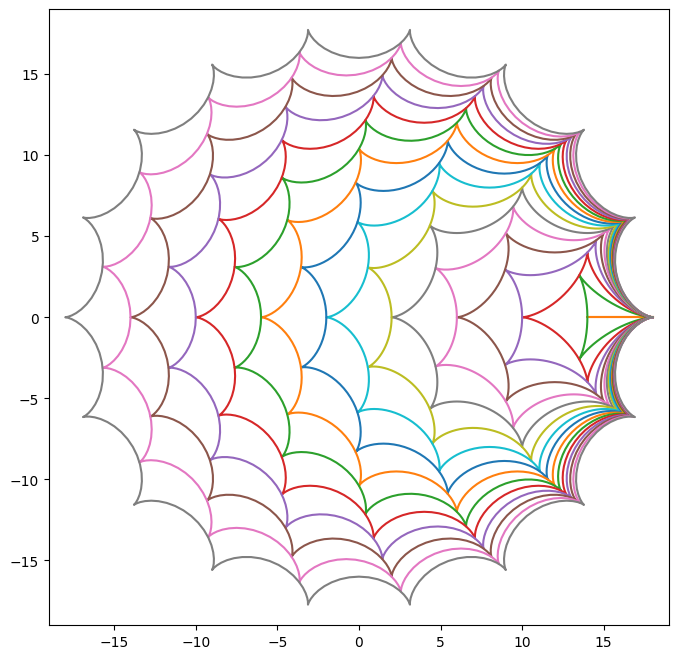

In [36]:
def loop2(RR, step=360):
  boundary = RR+1
  r = 1
  a = 1
  for R in range(1,RR+1,1):
    #compute number of cycles to complete the spirograph
    n = int(r/gcdEuclid(R,r))
    s = np.array(range(n*step+1))
    plt.rcParams["figure.figsize"] = (8,8)
    plt.xlim(-boundary,boundary)
    plt.ylim(-boundary,boundary)
    thetas = 2*np.pi*s/step
    xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)-R+RR
    ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
    plt.plot(xs, ys)
  plt.show()
loop2(18, step=360)

**News:**
*The following code cell is an update in cohorts to first session of Dr. Y.M. Chan*

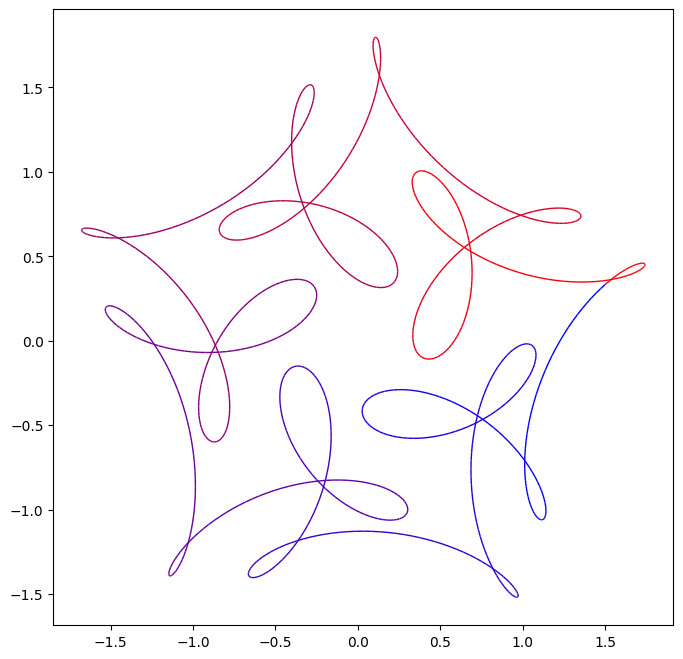

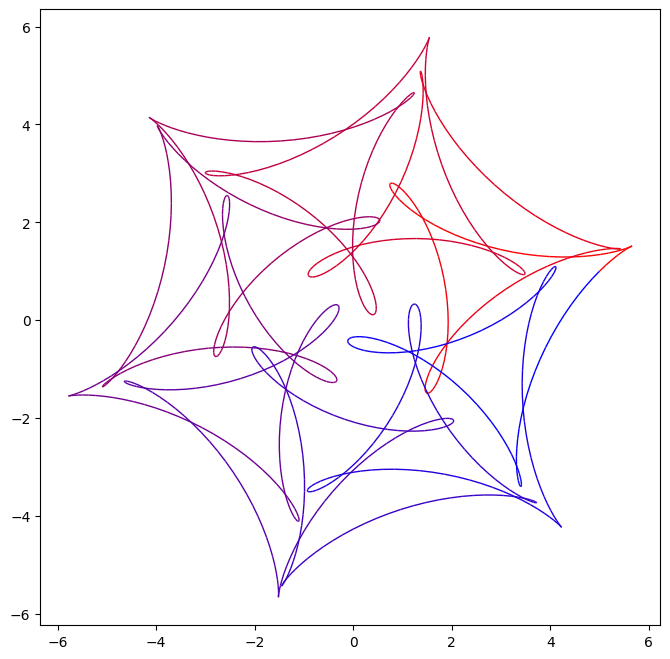

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

def rollingCirclesColorized(r1, r2, r3, m2, m3, n, boundary, step=1080):
  s = np.array(range(n*step+1))
  plt.rcParams["figure.figsize"] = (8,8)
  plt.xlim(-boundary,boundary)
  plt.ylim(-boundary,boundary)
  thetas = 2*np.pi*s/step
  xs = r1*np.cos(thetas)+r2*np.cos(thetas*m2)+r3*np.sin(thetas*m3)
  ys = r1*np.sin(thetas)+r2*np.sin(thetas*m2)+r3*np.cos(thetas*m3)

  #amend this line for other other coloring effect
  cmap = LinearSegmentedColormap.from_list("", [(1, 0, 0), (0, 0, 1)])

  points = np.array([xs, ys]).T.reshape(-1,1,2)
  segments = np.concatenate([points[:-1],points[1:]], axis=1)

  lc = LineCollection(segments, cmap=cmap, linewidth=1)
  lc.set_array(thetas)
  plt.gca().add_collection(lc)
  plt.gca().autoscale()
  plt.show()

#Dr. Chan's favorite, you may amend to look for your own too
rollingCirclesColorized(r1=1,r2=1/2,r3=1/3,m2=6,m3=14, n = 1, boundary = 3)

#such as this trial
rollingCirclesColorized(r1=3,r2=2,r3=1,m2=10,m3=23, n = 1, boundary = 3)


**Remarks**

Through the interaction in the programmable environment, at least a lesson learn here is to use numpy to manipulate arrays of numbers and matplotlib to visualize the data.

These tools open up many possibilities in teaching and learning. Some previous collaborative efforts serve as good teaching cases that could be [found here](https://github.com/HanlunAI/NextGenCurriculumDemonstration) or [here](https://github.com/HanlunAI/ATasteOfDeepLearning). If time permits, we could go through [this notebook](https://github.com/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationDelta.ipynb) as well.